In [125]:
import pandas as pd
import os
df = pd.read_csv('scores/handle_time_score.csv', index_col=0)
df

,old,prophet,kpi,start_train,end_train
bro,48697.394231,43695.842907,handle_time,2016-03-10,2020-06-01
psg,82164.500000,73158.413740,handle_time,2017-01-10,2020-06-01
wis,497281.224500,393280.911400,handle_time,2016-01-20,2020-06-01
scs,124690.785700,100969.886000,handle_time,2018-01-20,2020-06-01
ris,141385.193900,112769.400400,handle_time,2017-01-20,2020-06-01
rcs,37143.693880,37131.786030,handle_time,2016-04-30,2020-06-01
col,124690.785714,484255.237171,handle_time,2017-01-01,2020-06-01


In [126]:
end = ['2020-06-01']*7
start = ['2016-03-10','2017-01-10', '2016-01-20', '2017-01-01', 
       '2018-01-20', '2017-01-20', '2016-04-30']
bu = ['bro', 'psg', 'wis', 'col', 'scs', 'ris', 'rcs']
kpi = ['handle_time']*7

# for line in list(zip(bu, kpi, start, end)):
#     stream = os.popen('python code/run_model.py '+line[0]+'_aht_vol.csv '+line[1]+ ' '+line[2]+' '+line[3]+ ' 200')
#     output = stream.readlines()
#     output

In [127]:
df['diff (sec)'] = (df['old'] - df['prophet'])

df['diff (hours)'] = df['diff (sec)']/3600

hours_saved = df[df.index!='col']['diff (hours)'].sum()

print('Daily Hours Saved:',round(hours_saved,1))
print('Annual Savings:',round(hours_saved * 262 * 25, 2))

Daily Hours Saved: 47.3
Annual Savings: 309954.28


# approximately 47 hours per day in handle time savings
accross 262 business days at approximately `$25 per hour = $309,954 per year` in labor allocation cost savings across BRO, PSG, RIS, SCS, RCS, and WISE 

In [130]:
df[df.index!='col'][['diff (hours)']]

,diff (hours)
bro,1.389320
psg,2.501691
wis,28.888976
scs,6.589139
ris,7.948832
rcs,0.003308


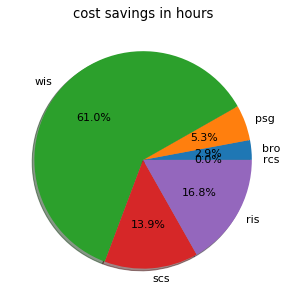

In [138]:
df['diff (sec)'][df.index!='col'].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('cost savings in hours')
plt.ylabel('')
plt.show()